In [25]:
"""
Example implementations of HARK.ConsumptionSaving.ConsPortfolioModel
"""
from time import time

import matplotlib.pyplot as plt
import numpy as np

from HARK.ConsumptionSaving.ConsPortfolioModel import (
    PortfolioConsumerType,
)
from HARK.utilities import plot_funcs

In [26]:
# Make and solve an example portfolio choice consumer type
print("Now solving an example portfolio choice problem; this might take a moment...")
MyType = PortfolioConsumerType()
MyType.cycles = 0
t0 = time()
MyType.solve()
t1 = time()
MyType.cFunc = [MyType.solution[t].cFuncAdj for t in range(MyType.T_cycle)]
MyType.ShareFunc = [MyType.solution[t].ShareFuncAdj for t in range(MyType.T_cycle)]
MyType.EndOfPrdShareFunc = [MyType.solution[t].EndOfPrdShareFunc for t in range(MyType.T_cycle)]
MyType.ApproxShareFunc = [MyType.solution[t].ApproxShareFunc for t in range(MyType.T_cycle)]
MyType.ApproxSecondOrderShareFunc = [MyType.solution[t].ApproxSecondOrderShareFunc for t in range(MyType.T_cycle)]
print(
    "Solving an infinite horizon portfolio choice problem took "
    + str(t1 - t0)
    + " seconds."
)

Now solving an example portfolio choice problem; this might take a moment...
Solving an infinite horizon portfolio choice problem took 8.267216920852661 seconds.


Consumption function over market resources:


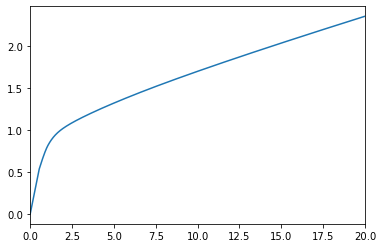

Risky asset share as a function of market resources:
Optimal (blue) versus Theoretical Limit (orange)


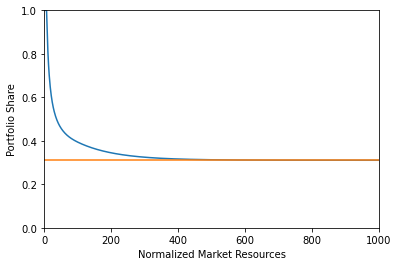

In [27]:
# Plot the consumption and risky-share functions
print("Consumption function over market resources:")
plot_funcs(MyType.cFunc[0], 0.0, 20.0)
print("Risky asset share as a function of market resources:")
print("Optimal (blue) versus Theoretical Limit (orange)")
plt.xlabel("Normalized Market Resources")
plt.ylabel("Portfolio Share")
plt.ylim(0.0, 1.0)
# Since we are using a discretization of the lognormal distribution,
# the limit is numerically computed and slightly different from
# the analytical limit obtained by Merton and Samuelson for infinite wealth
plot_funcs(
    [
        MyType.ShareFunc[0],
        lambda m: MyType.ShareLimit * np.ones_like(m),
    ],
    0.0,
    1000.0,
)

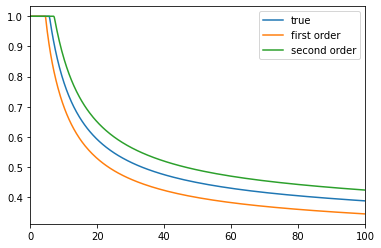

In [29]:
plot_funcs(
    [
        MyType.EndOfPrdShareFunc[0],  # blue
        MyType.ApproxShareFunc[0],  # orange
        MyType.ApproxSecondOrderShareFunc[0]  # green

    ],
    0.0,
    100.0, legend_kwds={"labels": ["true", "first order", "second order"]})